In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv('Pizza_Sale.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [44]:
def date_taime(text):
    try:
        return pd.to_datetime(text, format="%d-%m-%Y")
    except ValueError:
        try:
            return pd.to_datetime(text, format="%d/%m/%Y")
        except ValueError:
            return pd.NaT
df['order_date'] = df['order_date'].apply(date_taime)

df.dropna(inplace= True)

In [45]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [46]:
df = df.drop(columns=['pizza_id',"order_id"])

In [47]:
df['order_date'] = df['order_date'].astype(str)
df['order_time'] = df['order_time'].astype(str)

df['order_datetime'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48554 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_name_id      48554 non-null  object        
 1   quantity           48554 non-null  int64         
 2   order_date         48554 non-null  object        
 3   order_time         48554 non-null  object        
 4   unit_price         48554 non-null  float64       
 5   total_price        48554 non-null  float64       
 6   pizza_size         48554 non-null  object        
 7   pizza_category     48554 non-null  object        
 8   pizza_ingredients  48554 non-null  object        
 9   pizza_name         48554 non-null  object        
 10  order_datetime     48554 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 4.4+ MB


In [49]:
df.head()

,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_datetime
0,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36
1,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40
2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 11:57:40
3,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 11:57:40
4,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 11:57:40


In [50]:
df = df.drop(columns=['order_date','order_time'])

In [51]:
df = df.set_index('order_datetime')

In [52]:
daily_sale = df['quantity'].resample('D').sum()

In [54]:
daily_sale = pd.DataFrame(daily_sale)

In [55]:
daily_sale.head()

,quantity
order_datetime,
2015-01-01,156
2015-01-02,160
2015-01-03,143
2015-01-04,92
2015-01-05,106


<Axes: xlabel='order_datetime'>

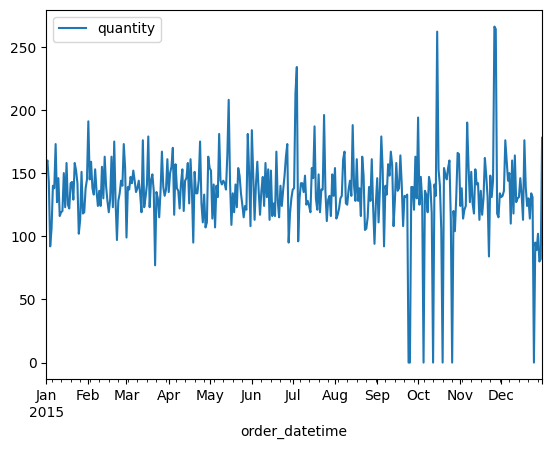

In [57]:
daily_sale.plot()

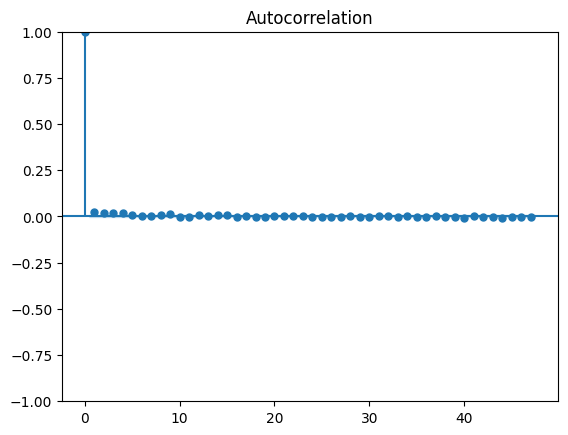

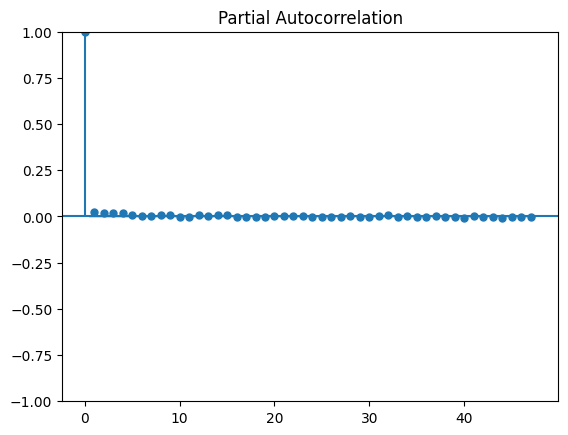

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['quantity'])
plot_pacf(df['quantity'])
plt.show()


In [66]:
from statsmodels.tsa.arima.model import ARIMA
p = 1
d = 1
q = 0
# Define the order (p, d, q) based on the ACF/PACF plots
model = ARIMA(daily_sale['quantity'], order=(p, d, q))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                  365
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1827.679
Date:                Thu, 24 Oct 2024   AIC                           3659.359
Time:                        14:09:30   BIC                           3667.153
Sample:                    01-01-2015   HQIC                          3662.456
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3664      0.038     -9.604      0.000      -0.441      -0.292
sigma2      1344.6829     59.843     22.470      0.000    1227.394    1461.972
Ljung-Box (L1) (Q):                   3.90   Jarque-

In [73]:
# Forecast the next 7 days
forecast = model_fit.forecast(steps=30)
print(forecast)


2016-01-01    142.823127
2016-01-02    155.712839
2016-01-03    150.989717
2016-01-04    152.720390
2016-01-05    152.086227
2016-01-06    152.318601
2016-01-07    152.233453
2016-01-08    152.264653
2016-01-09    152.253221
2016-01-10    152.257410
2016-01-11    152.255875
2016-01-12    152.256437
2016-01-13    152.256231
2016-01-14    152.256307
2016-01-15    152.256279
2016-01-16    152.256289
2016-01-17    152.256286
2016-01-18    152.256287
2016-01-19    152.256286
2016-01-20    152.256287
2016-01-21    152.256287
2016-01-22    152.256287
2016-01-23    152.256287
2016-01-24    152.256287
2016-01-25    152.256287
2016-01-26    152.256287
2016-01-27    152.256287
2016-01-28    152.256287
2016-01-29    152.256287
2016-01-30    152.256287
Freq: D, Name: predicted_mean, dtype: float64


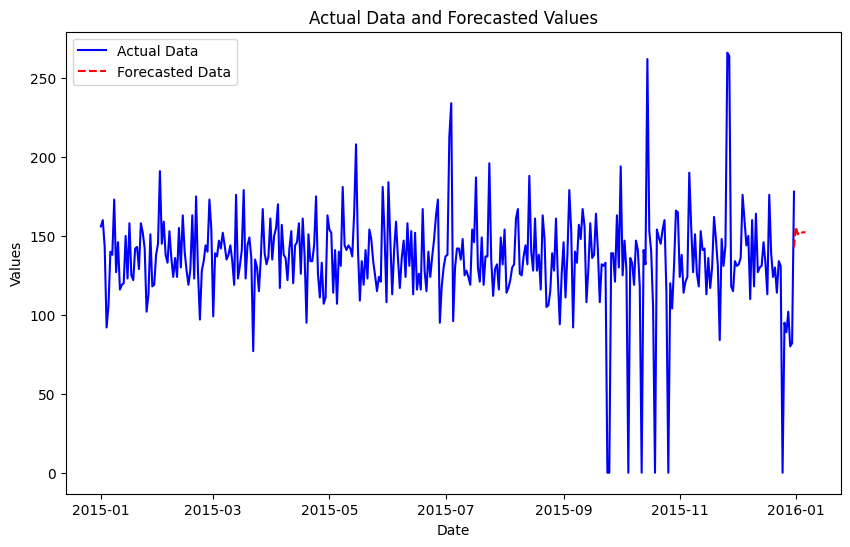

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming forecast is a list or a numpy array
forecast_values = forecast  # replace with the actual output if needed

# Create a date range for the next 7 days (or 7 time steps)
# Assuming your data has a datetime index and you want to forecast daily values
last_date = daily_sale.index[-1]  # get the last date from your data's index
forecast_dates = pd.date_range(last_date, periods=7, freq='D')

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(daily_sale.index, daily_sale['quantity'], label='Actual Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted Data', color='red', linestyle='dashed')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual Data and Forecasted Values')
plt.legend()

# Show the plot
plt.show()


In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Adjust the seasonal order based on the periodicity of your data
model = SARIMAX(daily_sale['quantity'], order=(1,1,0), seasonal_order=(1,1,1,7))  # s=7 for weekly seasonality
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)


2016-01-01    116.129194
2016-01-02    148.175379
2016-01-03    118.227983
2016-01-04    131.314100
2016-01-05    130.118561
2016-01-06    132.101792
2016-01-07    162.635037
2016-01-08    158.490272
2016-01-09    156.846900
2016-01-10    128.202281
2016-01-11    138.028927
2016-01-12    143.677686
2016-01-13    145.034101
2016-01-14    158.798603
2016-01-15    169.560836
2016-01-16    159.200089
2016-01-17    130.872169
2016-01-18    139.860185
2016-01-19    147.286146
2016-01-20    148.481261
2016-01-21    157.880354
2016-01-22    172.522963
2016-01-23    159.893086
2016-01-24    131.647664
2016-01-25    140.417370
2016-01-26    148.305917
2016-01-27    149.459044
2016-01-28    157.721901
2016-01-29    173.374501
2016-01-30    160.154012
Freq: D, Name: predicted_mean, dtype: float64


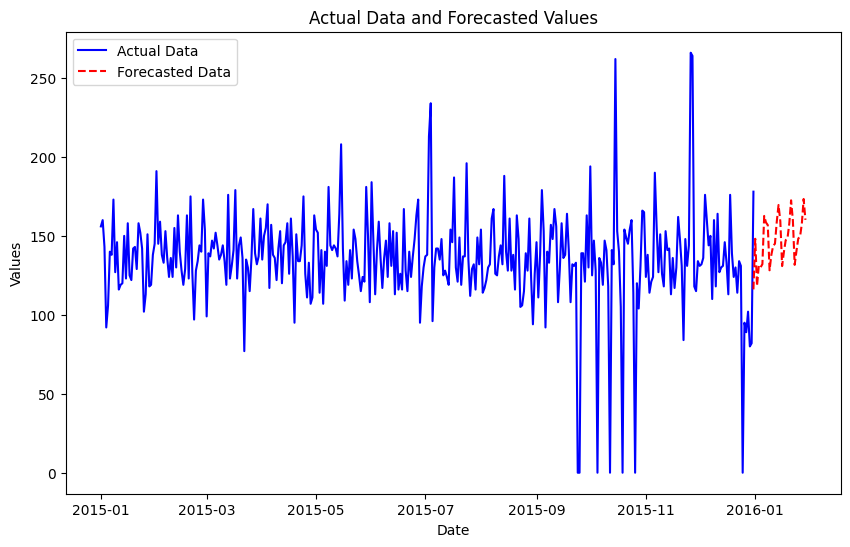

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming forecast is a list or a numpy array
forecast_values = forecast  # replace with the actual output if needed

# Create a date range for the next 7 days (or 7 time steps)
# Assuming your data has a datetime index and you want to forecast daily values
last_date = daily_sale.index[-1]  # get the last date from your data's index
forecast_dates = pd.date_range(last_date, periods=30, freq='D')

# Plot the actual data
plt.figure(figsize=(10, 6))
plt.plot(daily_sale.index, daily_sale['quantity'], label='Actual Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_dates, forecast_values, label='Forecasted Data', color='red', linestyle='dashed')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual Data and Forecasted Values')
plt.legend()

# Show the plot

In [81]:
# Define the split size (80% for training, 20% for testing)
split_ratio = 0.8

train_size = int(len(daily_sale) * split_ratio)

train_data = daily_sale['quantity'][:train_size]
test_data = daily_sale['quantity'][train_size:]

In [79]:
# Train SARIMAX model on training data
model = SARIMAX(train_data, order=(1,1,0), seasonal_order=(1,1,1,7))  # Adjust (P, D, Q, s) as needed
model_fit = model.fit()

# Forecast over the testing period
forecast = model_fit.forecast(steps=len(test_data))

# Compare the forecast with the actual test data
print(forecast)


2015-10-20     91.635496
2015-10-21     72.608614
2015-10-22    108.730692
2015-10-23     84.756490
2015-10-24     87.055755
                 ...    
2015-12-27    -47.656394
2015-12-28    -90.441374
2015-12-29    -31.932568
2015-12-30    -39.926377
2015-12-31    -20.494832
Freq: D, Name: predicted_mean, Length: 73, dtype: float64


In [80]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 16608.370898939866


# profet

In [13]:
df_ = pd.read_csv('Pizza_Sale.csv')

In [14]:
def date_taime(text):
    try:
        return pd.to_datetime(text, format="%d-%m-%Y")
    except ValueError:
        try:
            return pd.to_datetime(text, format="%d/%m/%Y")
        except ValueError:
            return pd.NaT
df_['order_date'] = df_['order_date'].apply(date_taime)

df_.dropna(inplace= True)

In [15]:
df_['order_date'] = df_['order_date'].astype(str)
df_['order_time'] = df_['order_time'].astype(str)

df_['order_datetime'] = pd.to_datetime(df_['order_date'] + ' ' + df_['order_time'])

In [16]:
import pandas as pd

# Assuming you have a DataFrame `daily_sale` with columns 'order_date' and 'quantity'
df_prophet = df_[['order_datetime', 'quantity']].copy()

df_prophet = df_prophet.set_index('order_datetime')
df_resampled = df_prophet['quantity'].resample('D').sum().reset_index()

# Rename the columns to match Prophet's expectations
df_resampled.columns = ['ds', 'y']

# Convert the 'ds' column to datetime if it isn't already
df_resampled['ds'] = pd.to_datetime(df_resampled['ds'])


In [17]:
from prophet import Prophet

# Create a Prophet model instance
model = Prophet()

# Fit the model to your data
model.fit(df_resampled)


21:55:19 - cmdstanpy - INFO - Chain [1] start processing
21:55:19 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a DataFrame to hold future dates (for the next 30 days)
future = model.make_future_dataframe(periods=30)

# Generate the forecast
forecast = model.predict(future)

# View the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds        yhat  yhat_lower  yhat_upper
390 2016-01-26  127.190155   93.635532  163.824809
391 2016-01-27  128.310918   92.385266  161.873528
392 2016-01-28  135.664215  102.464649  169.426330
393 2016-01-29  153.077546  118.146801  188.236994
394 2016-01-30  138.410244  102.051563  173.256617


C:\Users\New\AppData\Local\Temp\ipykernel_15808\1517200101.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


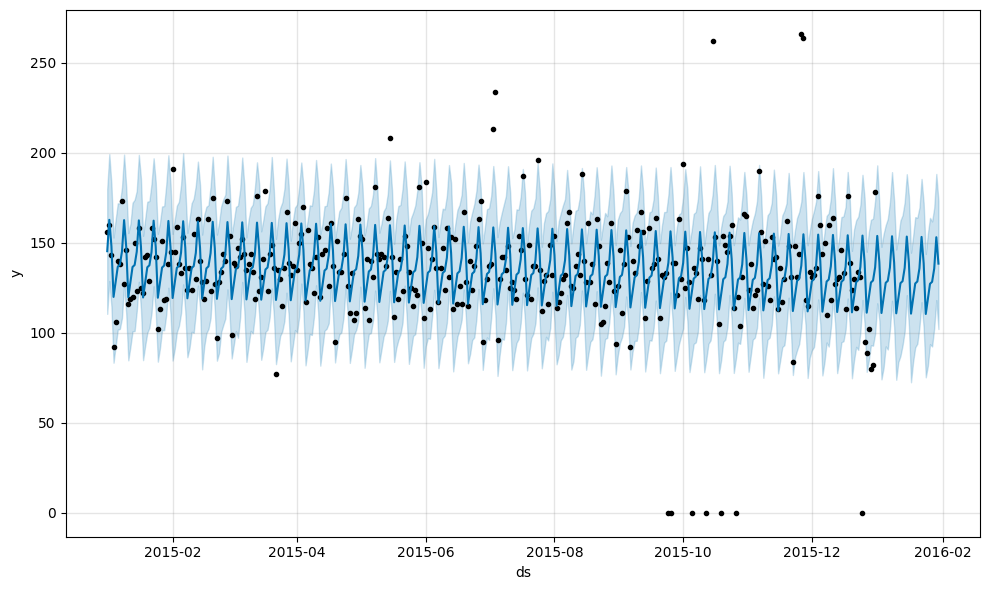

In [19]:
from prophet.plot import plot_plotly

# Plot the forecast
fig = model.plot(forecast)
fig.show()


C:\Users\New\AppData\Local\Temp\ipykernel_15808\39874487.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  components_fig.show()


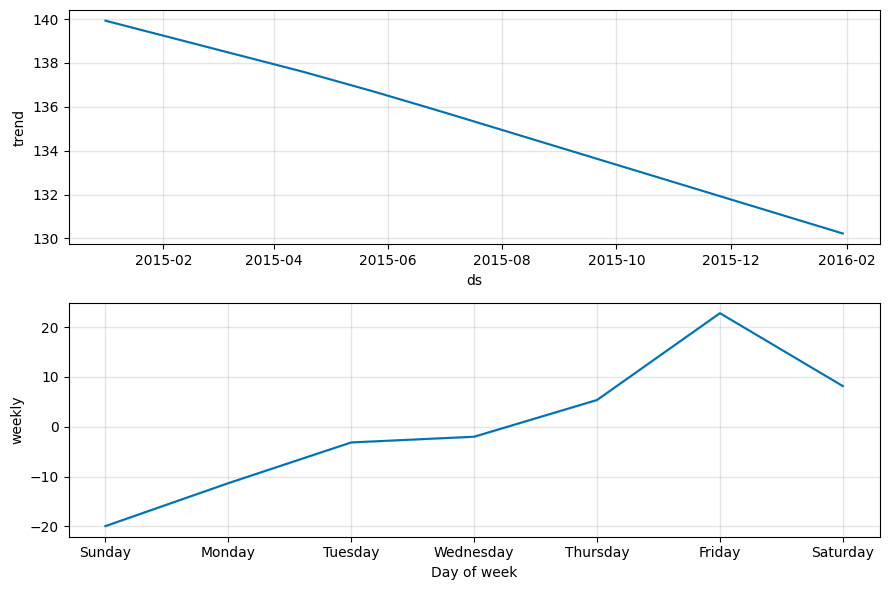

In [20]:
from prophet.plot import plot_components_plotly

# Plot forecast components (trend, seasonality, etc.)
components_fig = model.plot_components(forecast)
components_fig.show()


21:59:00 - cmdstanpy - INFO - Chain [1] start processing
21:59:00 - cmdstanpy - INFO - Chain [1] done processing


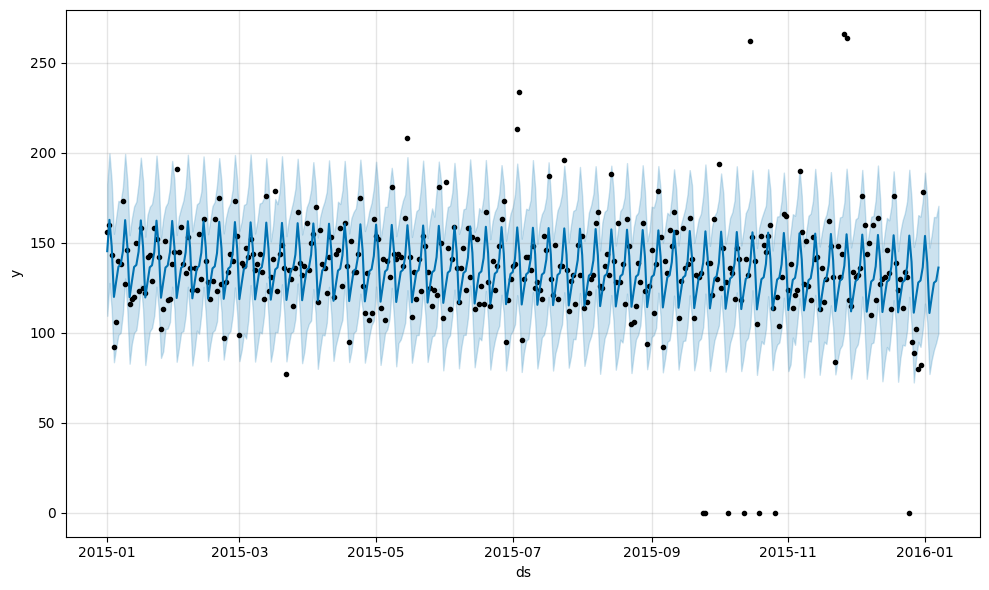

In [23]:
# Train on the first part of the data
train_data = df_resampled[df_resampled['ds'] < '2016-01-01']  # Example date

# Create and fit the model on the training data
model = Prophet()
model.fit(train_data)

# Predict future values
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Plot the forecast to compare with actual values
fig = model.plot(forecast)
